In [9]:
import vk_api
import requests
import time as t 
import csv
import pandas as pd
import vk
import re
from datetime import datetime, date, time, timedelta
import time

token = 
groupid = 'prosvetlennyj'



In [10]:
def parse_vk(token, groupid):
    s = vk.Session(access_token=token) 
    api = vk.API(s) 
    group_stat = api.groups.getMembers(group_id=groupid, v='5.21' ,\
    fields='id, bdate, can_write_private_message, sex, city,  status, relation, relatives,  photo_max_orig, domain,  bdate_visibility') 
    count=group_stat['count']//1000
    df=pd.DataFrame(group_stat['items'])
    dfn=df.dropna(subset=['city'])
    for i in range(1, count+1):  

        group_stat = api.groups.getMembers(group_id=groupid, v='5.21' ,\
        fields='id, bdate, can_write_private_message, sex, city,  status, relation, relatives,  photo_max_orig, domain, bdate_visibility',\
        offset=i*1000)
        df1=pd.DataFrame(group_stat['items'])
        df=df.append(df1)
        time.sleep(0.3)
    return df

In [11]:
df=parse_vk(token, groupid)

In [12]:
dfnotna=df.dropna(subset=['bdate'])

In [13]:
dfnotna[['day','month','year']]=dfnotna['bdate'].str.split('.', expand=True)

e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:>

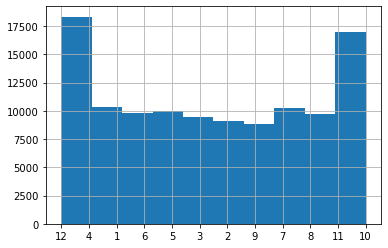

In [14]:
dfnotna['month'].hist()

Как видим, дни рождения распределенны неравномерно и есть два пика - Июнь и Октябрь (6 и 10 месяцы)

In [18]:
dfnotna.reset_index(drop=True, inplace=True)

In [19]:
dfnotna.loc[(dfnotna['day']=='1')&(dfnotna['month']=='1')]

,first_name,id,last_name,sex,domain,city,photo_max_orig,can_write_private_message,status,relation,relatives,deactivated,bdate,status_audio,relation_partner,day,month,year
192,Мария,263301,Седова,1,yunga,"{'id': 1, 'title': 'Москва'}",https://sun1-29.userapi.com/s/v1/ig2/GQbiFthmC...,0,"«Пока ты творишь, хорошо, а грехом можно счита...",NaN,NaN,NaN,1.1.1989,NaN,NaN,1,1,1989
360,Дмитрий,461843,Макаров,2,geks69,"{'id': 1, 'title': 'Москва'}",https://sun1-90.userapi.com/s/v1/if1/dCHeQgq1n...,0,,NaN,NaN,NaN,1.1,NaN,NaN,1,1,None
680,Дамир,871221,Салеев,2,saldam83,"{'id': 2, 'title': 'Санкт-Петербург'}",https://sun1-91.userapi.com/s/v1/if1/WJX795LTL...,1,🇷🇺,NaN,NaN,NaN,1.1,NaN,NaN,1,1,None
722,Ксения,917421,Андреева-Глухова,1,ksenija_vladimirovna,"{'id': 2, 'title': 'Санкт-Петербург'}",https://sun1-89.userapi.com/s/v1/ig2/_4BxH53mT...,1,не поддавайтесь спокойствию и сохраняйте Паник...,0.0,"[{'type': 'sibling', 'id': 2614587}, {'type': ...",NaN,1.1,NaN,NaN,1,1,None
756,Ксения,966344,Корчагина,1,oksana2612,"{'id': 2, 'title': 'Санкт-Петербург'}",https://sun1-96.userapi.com/s/v1/ig2/7mQQlJ7ms...,0,"Если это бремя досталось мне, значит, оно мне ...",NaN,NaN,NaN,1.1,NaN,NaN,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112635,Дмитрий,632152296,Магадан,2,id632152296,NaN,https://sun1-99.userapi.com/s/v1/ig2/qEBCLApcq...,1,,0.0,[],NaN,1.1.1996,NaN,NaN,1,1,1996
112639,Василий,632205128,Глухов,2,id632205128,NaN,https://sun1-92.userapi.com/s/v1/ig2/y2YeWJlDs...,1,,0.0,[],NaN,1.1.1982,NaN,NaN,1,1,1982
112726,Буян,634939952,Доржу,2,chambal__853,NaN,https://sun1-99.userapi.com/s/v1/ig2/JgIifsBzh...,0,🙏ཨོཾ་མ་ཎི་པ་དྨེ་ཧཱུྃ🙏,NaN,NaN,NaN,1.1.1990,NaN,NaN,1,1,1990
112769,Сергей,636171027,Шомин,2,id636171027,NaN,https://sun1-26.userapi.com/s/v1/ig2/LDg7FFGQ8...,1,,0.0,[],NaN,1.1.1958,NaN,NaN,1,1,1958


In [20]:
count=len(dfnotna)//50
p=0
for i in range(count):
    d=dfnotna.iloc[(50*i):(50*(i+1))]
    p+=(d.groupby(['day', 'month']).count()['id']>1).sum()
    
print (p/count, '- вероятность найти одинаковые дни рождения в этом сообществе')

3.280141843971631 - вероятность найти одинаковые дни рождения в этом сообществе


In [1]:
#Вероятность которую хотят по заданию